In [564]:
# Library cell
import pandas as pd
import regex as re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import panel as pn
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [494]:
# Function cell
## Find non-numeric values
def find_non_numeric_values(df):
    non_numeric_columns = df.select_dtypes(include=['object']).columns
    non_numeric_values = {}
    for col in non_numeric_columns:
        # Change the column to numeric type, if it isn't numeric, it will be converted to NaN
        temp_col = pd.to_numeric(df[col], errors='coerce')      
        # Fill the NaN values with the original values
        non_numeric_data = df[temp_col.isna() & df[col].notna()]   
        if not non_numeric_data.empty:
            non_numeric_values[col] = non_numeric_data[col].tolist()  
    return non_numeric_values

## Remove non-numeric values
def remove_commas_and_convert(df):
    non_numeric_columns = df.select_dtypes(include=['object']).columns
    for col in non_numeric_columns:
        # Check if the column contains any non-numeric values
        try:
           # Remove commas from the column
            temp_col = df[col] = df[col].str.replace(',', '')
            temp_col_numeric = pd.to_numeric(temp_col, errors='raise')  
            # If the column can be converted to numeric, replace the original column with the new column
            df[col] = temp_col_numeric
        except ValueError:
            # If the column contains non-numeric values, keep it
            continue
    return df

In [495]:
file_path = r'D:\Repo-train\Jnotebook\FDI_Analytics\dataset\fdi_industry_en.csv'
df = pd.read_csv(file_path)

In [496]:
df.head()

,Order,Industry,Number of new projects,Newly registered capital (million USD),Adjusted project number,Adjusted capital (million USD),Number of times of capital contribution to buy shares,"Value of capital contribution, share purchase\n(million USD)",Year
0,1,Manufacturing and processing industry,1020,9812.57,861,5132.55,290,593.51,2016
1,2,"Wholesale and retail; repair cars, motorbikes,...",505,367.04,99,320.72,1269,1211.45,2016
2,3,Real estate business,59,1522.67,12,-559.05,80,722.55,2016
3,4,"Professional activities, science and technology",282,436.45,65,316.95,212,179.68,2016
4,5,Warehousing transportation,88,703.94,22,-29,119,207.19,2016


In [497]:
df.tail()

,Order,Industry,Number of new projects,Newly registered capital (million USD),Adjusted project number,Adjusted capital (million USD),Number of times of capital contribution to buy shares,"Value of capital contribution, share purchase\n(million USD)",Year
126,127,Extractive,1,2,-,-,3,17.09,2022
127,128,Accommodation and food services,33,8,18,-59.82,240,63.71,2022
128,129,Other service activities,2,0,4,3.37,17,2.24,2022
129,130,"Art, play and entertainment",1,0,1,0.15,11,3.5,2022
130,131,Employment activities in households,-,-,-,-,1,0.55,2022


In [498]:
# Analyze the data
## Drop column Order
n_df = df.drop(columns=['Order'])
## Show shape data
print(n_df.shape, end='\n ---------------- \n')
## Show info data
print(n_df.info(), end='\n ---------------- \n')
## Check for Duplicate
print(n_df.nunique(), end='\n ---------------- \n')
## Check data exist nan or not (bool)
print(n_df.isnull().any(), end='\n ---------------- \n')
## Check for missing value
print(n_df.isna().sum(), end='\n ---------------- \n')

(131, 8)
 ---------------- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 8 columns):
 #   Column                                                       Non-Null Count  Dtype 
---  ------                                                       --------------  ----- 
 0   Industry                                                     131 non-null    object
 1   Number of new projects                                       131 non-null    object
 2   Newly registered capital (million USD)                       131 non-null    object
 3   Adjusted project number                                      127 non-null    object
 4   Adjusted capital (million USD)                               127 non-null    object
 5   Number of times of capital contribution to buy shares        124 non-null    object
 6   Value of capital contribution, share purchase
(million USD)  124 non-null    object
 7   Year                                                         1

#### Data Cleaning 

In [499]:
## Check for not numeric value
non_numeric_dict = find_non_numeric_values(n_df)
if non_numeric_dict:
    for col, values in non_numeric_dict.items():
        print(f"Column '{col}' have values not numeric:")
        print(values)
else:
    print("No non-numeric values found.")

Column 'Industry' have values not numeric:
['Manufacturing and processing industry', 'Wholesale and retail; repair cars, motorbikes, motorbikes', 'Real estate business', 'Professional activities, science and technology', 'Warehousing transportation', 'Construction', 'Financial, banking and insurance activities', 'Water supply and waste treatment', 'Accommodation and food services', 'Information and communication', 'Art, play and entertainment', 'Administrative activities and support services', 'Producing and distributing electricity, gas, water, air conditioning', 'Agriculture, forestry and fisheries', 'Extractive', 'Other service activities', 'Education and training', 'Health and social assistance activities', 'Employment activities in households', 'Manufacturing and processing industry', 'Producing and distributing electricity, gas, water, air conditioning', 'Real estate business', 'Wholesale and retail; repair cars, motorbikes, motorbikes', 'Extractive', 'Construction', 'Professiona

In [500]:
## Drop comma value
n_df = remove_commas_and_convert(n_df)

In [501]:
# Drop ' - ' value
### Drop ' - ' value column 'Number of new projects'
n_df['Number of new projects'] = n_df['Number of new projects'].replace(to_replace=r'[^0-9.]', value=0, regex=True)
### Drop ' - ' value column 'Newly registered capital (million USD)'
n_df['Newly registered capital (million USD)'] = n_df['Newly registered capital (million USD)'].replace(to_replace=r'[^0-9.]', value=0, regex=True)
### Drop ' - ' value column 'Adjusted project number'
n_df['Adjusted project number'] = n_df['Adjusted project number'].replace(to_replace=r'[^0-9.]', value=0, regex=True)
### Drop ' - ' value column 'Adjusted capital (million USD)'
n_df['Adjusted capital (million USD)'] = n_df['Adjusted capital (million USD)'].replace(to_replace=r'[^0-9.]', value=0, regex=True)
### Drop ' - ' value column 'Number of times of capital contribution to buy shares'
n_df['Number of times of capital contribution to buy shares'] = n_df['Number of times of capital contribution to buy shares'].replace(to_replace=r'[^0-9.]', value=0, regex=True)
### Drop ' - ' value column 'Value of capital contribution, share purchase\n(million USD)'
n_df['Value of capital contribution, share purchase\n(million USD)'] = n_df['Value of capital contribution, share purchase\n(million USD)'].replace(to_replace=r'[^0-9.]', value=0, regex=True)

In [502]:
## Check for not numeric value
non_numeric_dict = find_non_numeric_values(n_df)
if non_numeric_dict:
    for col, values in non_numeric_dict.items():
        print(f"Column '{col}' have values not numeric:")
        print(values)
else:
    print("No non-numeric values found.")

Column 'Industry' have values not numeric:
['Manufacturing and processing industry', 'Wholesale and retail; repair cars motorbikes motorbikes', 'Real estate business', 'Professional activities science and technology', 'Warehousing transportation', 'Construction', 'Financial banking and insurance activities', 'Water supply and waste treatment', 'Accommodation and food services', 'Information and communication', 'Art play and entertainment', 'Administrative activities and support services', 'Producing and distributing electricity gas water air conditioning', 'Agriculture forestry and fisheries', 'Extractive', 'Other service activities', 'Education and training', 'Health and social assistance activities', 'Employment activities in households', 'Manufacturing and processing industry', 'Producing and distributing electricity gas water air conditioning', 'Real estate business', 'Wholesale and retail; repair cars motorbikes motorbikes', 'Extractive', 'Construction', 'Professional activities s

In [503]:
## Drop missing value fill with 0
### Adjusted project number   
n_df['Adjusted project number'] = n_df['Adjusted project number'].fillna(0)
### Adjusted capital (million USD)
n_df['Adjusted capital (million USD)'] = n_df['Adjusted capital (million USD)'].fillna(0)
### Number of times of capital contribution to buy shares       
n_df['Number of times of capital contribution to buy shares'] = n_df['Number of times of capital contribution to buy shares'].fillna(0)
### Value of capital contribution, share purchase\n(million USD)
n_df['Value of capital contribution, share purchase\n(million USD)'] = n_df['Value of capital contribution, share purchase\n(million USD)'].fillna(0)

In [504]:
n_df.sample(n=10)

,Industry,Number of new projects,Newly registered capital (million USD),Adjusted project number,Adjusted capital (million USD),Number of times of capital contribution to buy shares,"Value of capital contribution, share purchase\n(million USD)",Year
29,Warehousing transportation,74,173.17,29,143.29,137,70.12,2017
19,Manufacturing and processing industry,932,6860.36,761,7271.27,1365,1744.36,2017
31,Agriculture forestry and fisheries,17,179.31,14,2.59,29,9.65,2017
79,Professional activities science and technology,376,169.3,87,114.3,825,1062.96,2020
70,Education and training,71,24.96,12,9.36,172,30.3,2019
61,Producing and distributing electricity gas wat...,15,722.6,2,0,62,302.42,2019
91,Extractive,1,0.41,1,0.68,12,5.28,2020
35,Financial banking and insurance activities,3,0.18,2,69.87,32,18.17,2017
24,Construction,122,171.75,48,102.51,224,858.79,2017
94,Manufacturing and processing industry,533,7251.98,612,7346.30,650,3522.60,2021


In [505]:
## data consistency
cols_to_convert = n_df.columns.drop(['Industry', 'Year'])
n_df[cols_to_convert] = n_df[cols_to_convert].apply(pd.to_numeric, errors='coerce')
## Check for missing value
print(n_df.isnull().values.any())
print(n_df.isna().sum())

False
Industry                                                        0
Number of new projects                                          0
Newly registered capital (million USD)                          0
Adjusted project number                                         0
Adjusted capital (million USD)                                  0
Number of times of capital contribution to buy shares           0
Value of capital contribution, share purchase\n(million USD)    0
Year                                                            0
dtype: int64


In [506]:
# Summary statistics
n_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number of new projects,131.0,140.251908,254.032413,0.0,6.000,33.00,110.000,1314.00
Newly registered capital (million USD),131.0,866.555344,2170.593023,0.0,13.405,94.00,377.775,12093.14
Adjusted project number,131.0,62.557252,166.067834,0.0,3.000,13.00,31.500,861.00
Adjusted capital (million USD),131.0,417.013893,1403.382507,0.0,2.620,30.88,116.490,7977.90
Number of times of capital contribution to buy shares,131.0,285.427481,557.047188,0.0,12.500,68.00,250.500,3292.00
"Value of capital contribution, share purchase\n(million USD)",131.0,413.856107,871.367984,0.0,11.615,74.03,397.190,7086.66
Year,131.0,2018.992366,2.013402,2016.0,2017.000,2019.00,2021.000,2022.00


# Univariate Analysis

##### Total investment over the years

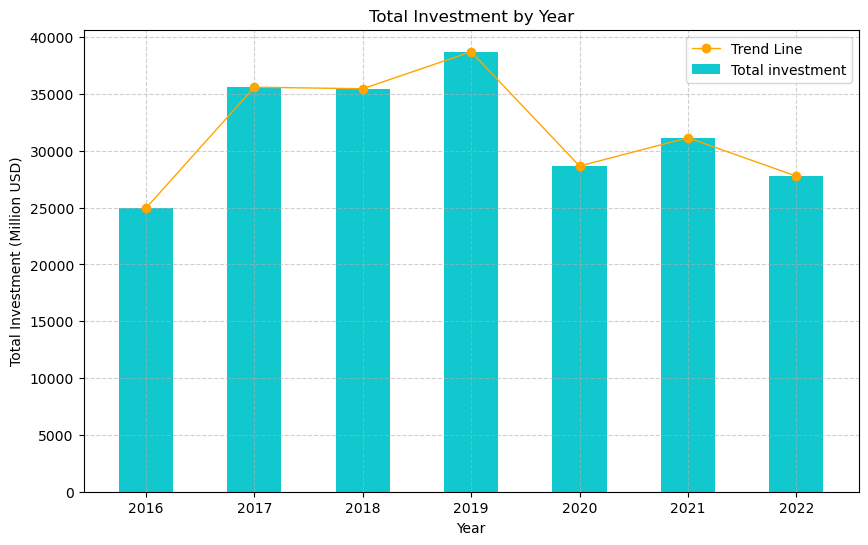

In [507]:
# Caculate the total investment in each row (add column 'Total investment')
n_df['Total investment'] = n_df['Newly registered capital (million USD)'] + n_df['Adjusted capital (million USD)'] + n_df['Value of capital contribution, share purchase\n(million USD)']
# Caculate the total investment in each year (group by year)
total_investment_by_year = n_df.groupby('Year')['Total investment'].sum().reset_index() 
# plot the total investment by year
plt.figure(figsize=(10, 6))
plt.bar(total_investment_by_year['Year'], total_investment_by_year['Total investment'], color='#10c8ce',width= 0.5 ,  label='Total investment')
plt.plot(total_investment_by_year['Year'], total_investment_by_year['Total investment'], color='orange', marker='o', linewidth=1, label='Trend Line')
plt.xlabel('Year')
plt.ylabel('Total Investment (Million USD)')
plt.title('Total Investment by Year')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [508]:
# Statistical analysis
total_investment_by_year['Change'] = total_investment_by_year['Total investment'].diff()
total_investment_by_year['Percentage Change'] = total_investment_by_year['Change']/total_investment_by_year['Total investment'].shift(1)*100
total_investment_by_year['Percentage Change'] = total_investment_by_year['Percentage Change'].round(2).astype(str) + '%'
total_investment_by_year

,Year,Total investment,Change,Percentage Change
0,2016,24960.96,NaN,nan%
1,2017,35605.15,10644.19,42.64%
2,2018,35469.20,-135.95,-0.38%
3,2019,38727.77,3258.57,9.19%
4,2020,28667.57,-10060.20,-25.98%
5,2021,31153.35,2485.78,8.67%
6,2022,27778.72,-3374.63,-10.83%


#### Ranking Industry get total investment each year

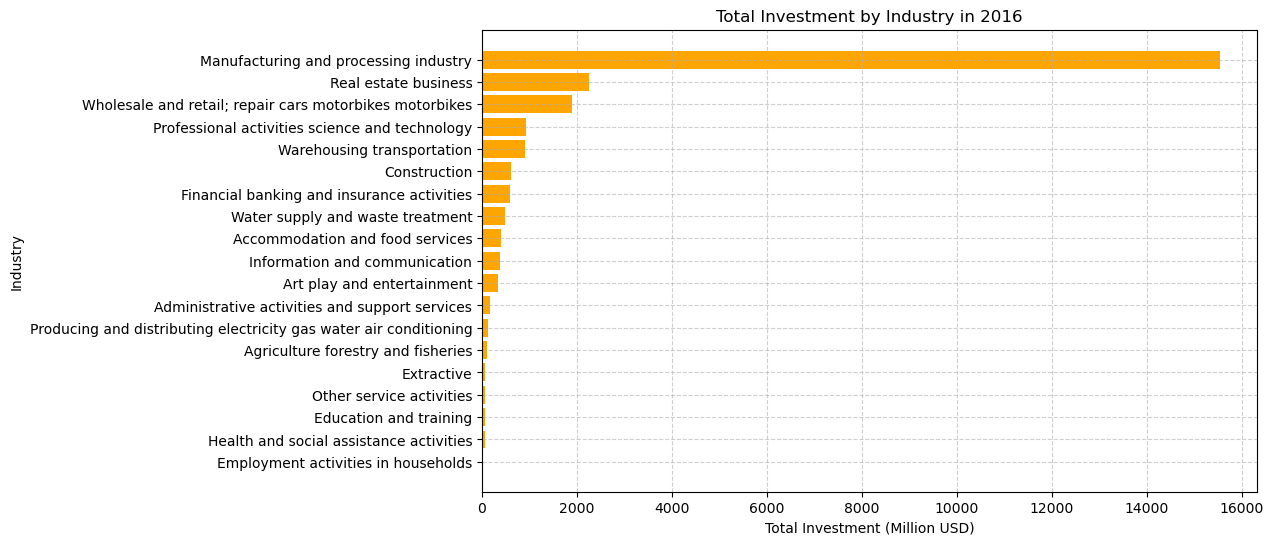

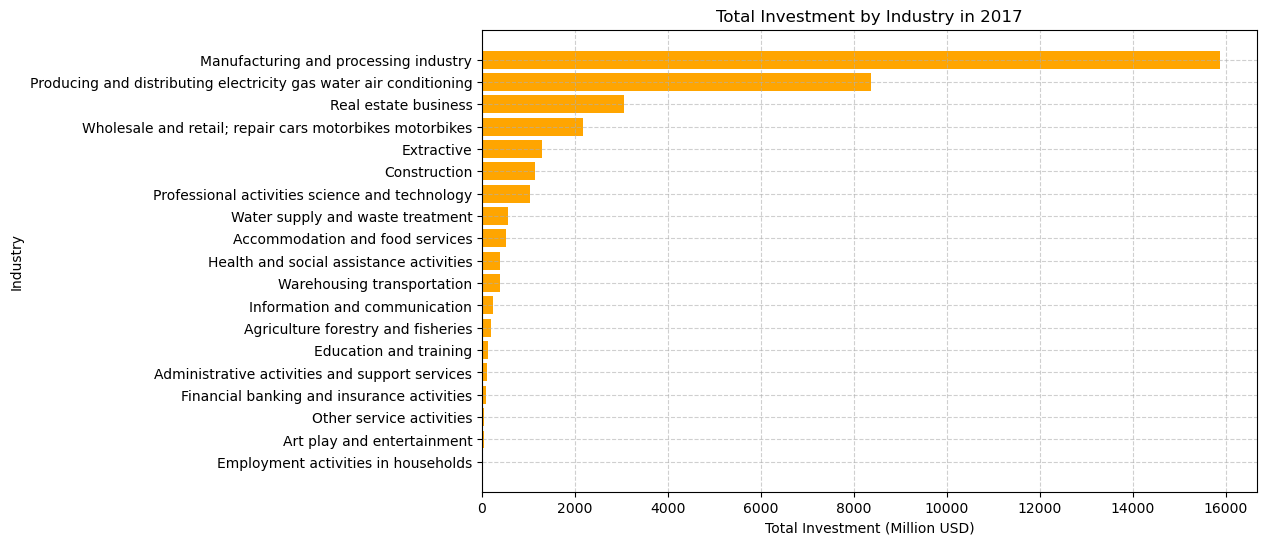

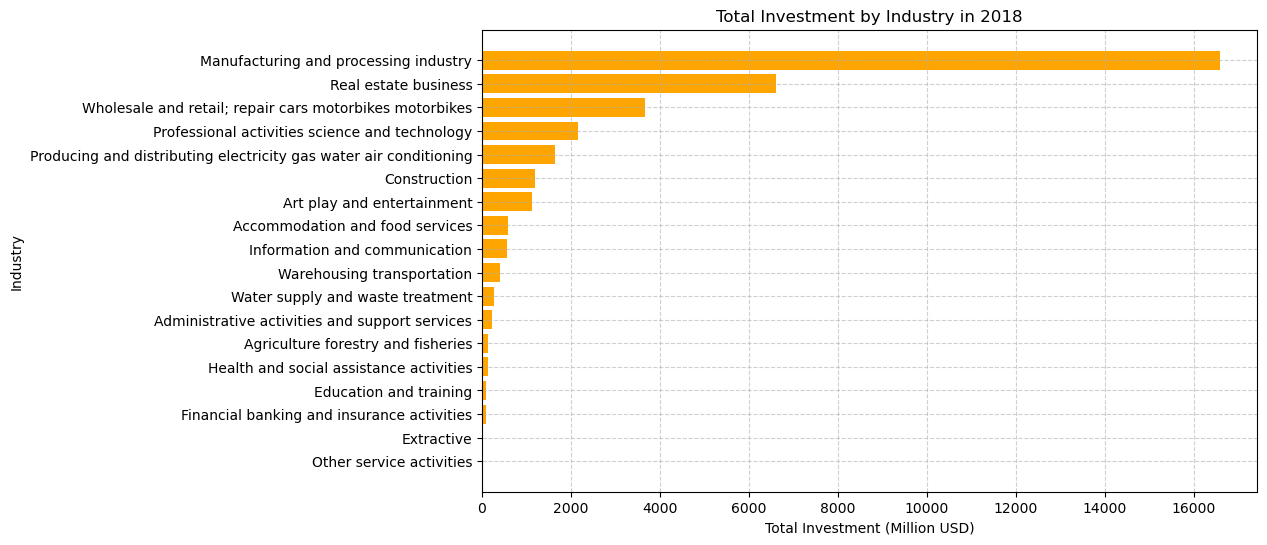

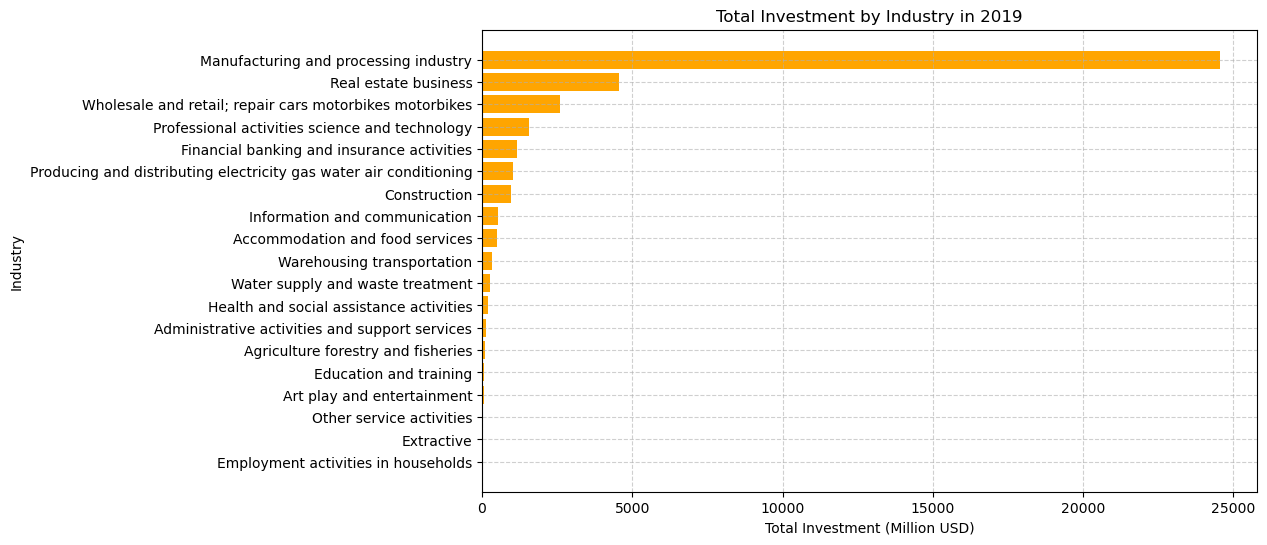

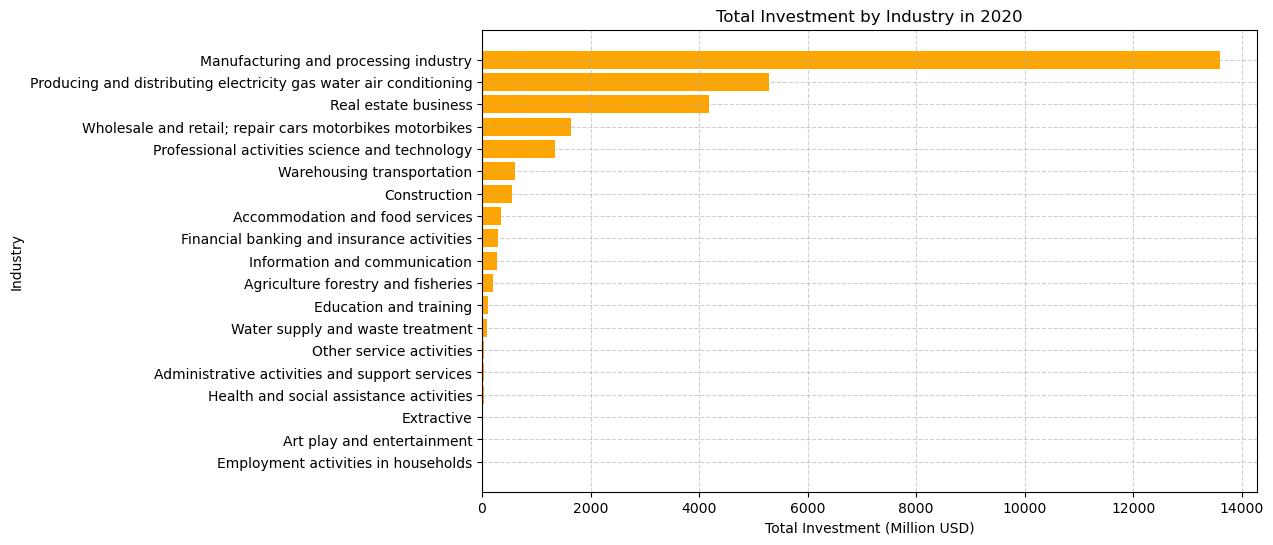

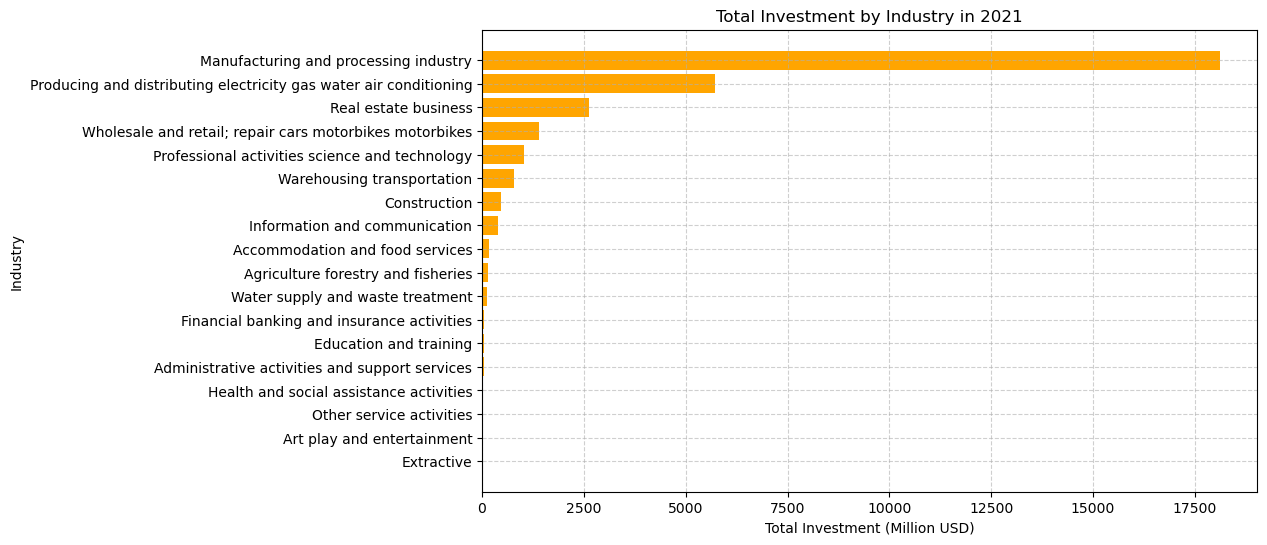

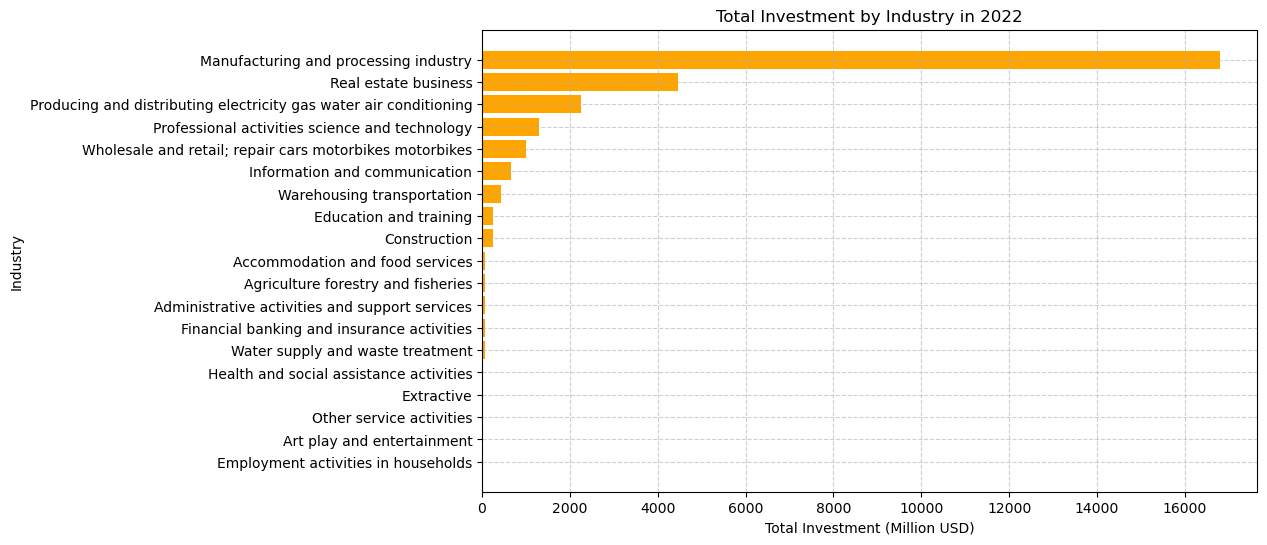

In [509]:
years = n_df['Year'].unique()
# Loop through each year and plot the total investment by industry
for year in years:
    # Filter data by year
    df_year = n_df[n_df['Year'] == year]
    # Sort the data by Total investment
    df_year.sort_values('Total investment', ascending=True, inplace=True)
    # Set axis values
    x = df_year['Industry'].values
    y = df_year['Total investment'].values
    # Plot
    plt.figure(figsize=(10, 6))
    plt.barh(x, y, color='orange')
    plt.xlabel('Total Investment (Million USD)')
    plt.ylabel('Industry')
    plt.title(f'Total Investment by Industry in {year}')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

In [510]:
# Create a pivot table
pivot_df = n_df.pivot_table(index='Industry', columns='Year', values='Total investment', aggfunc='sum')
# Sort the data by the total investment in 2020
pivot_df = pivot_df.sort_values(by=2020, ascending=True)
pivot_df.fillna(0, inplace=True)
pivot_df

Year,2016,2017,2018,2019,2020,2021,2022
Industry,,,,,,,
Employment activities in households,4.05,0.50,0.00,0.43,2.70,0.00,0.55
Art play and entertainment,329.80,37.72,1133.64,62.73,5.16,1.68,3.65
Extractive,70.02,1288.90,25.40,35.59,6.37,1.48,19.09
Health and social assistance activities,52.08,387.53,132.81,211.45,32.57,4.52,20.73
Administrative activities and support services,160.36,109.03,213.97,123.61,40.38,46.53,64.15
Other service activities,67.76,48.74,7.76,47.07,43.77,3.60,5.61
Water supply and waste treatment,488.26,568.00,259.20,249.27,88.01,116.93,57.44
Education and training,60.67,119.97,90.72,64.62,108.34,51.08,253.48
Agriculture forestry and fisheries,99.48,191.55,140.84,99.32,210.64,156.78,68.37


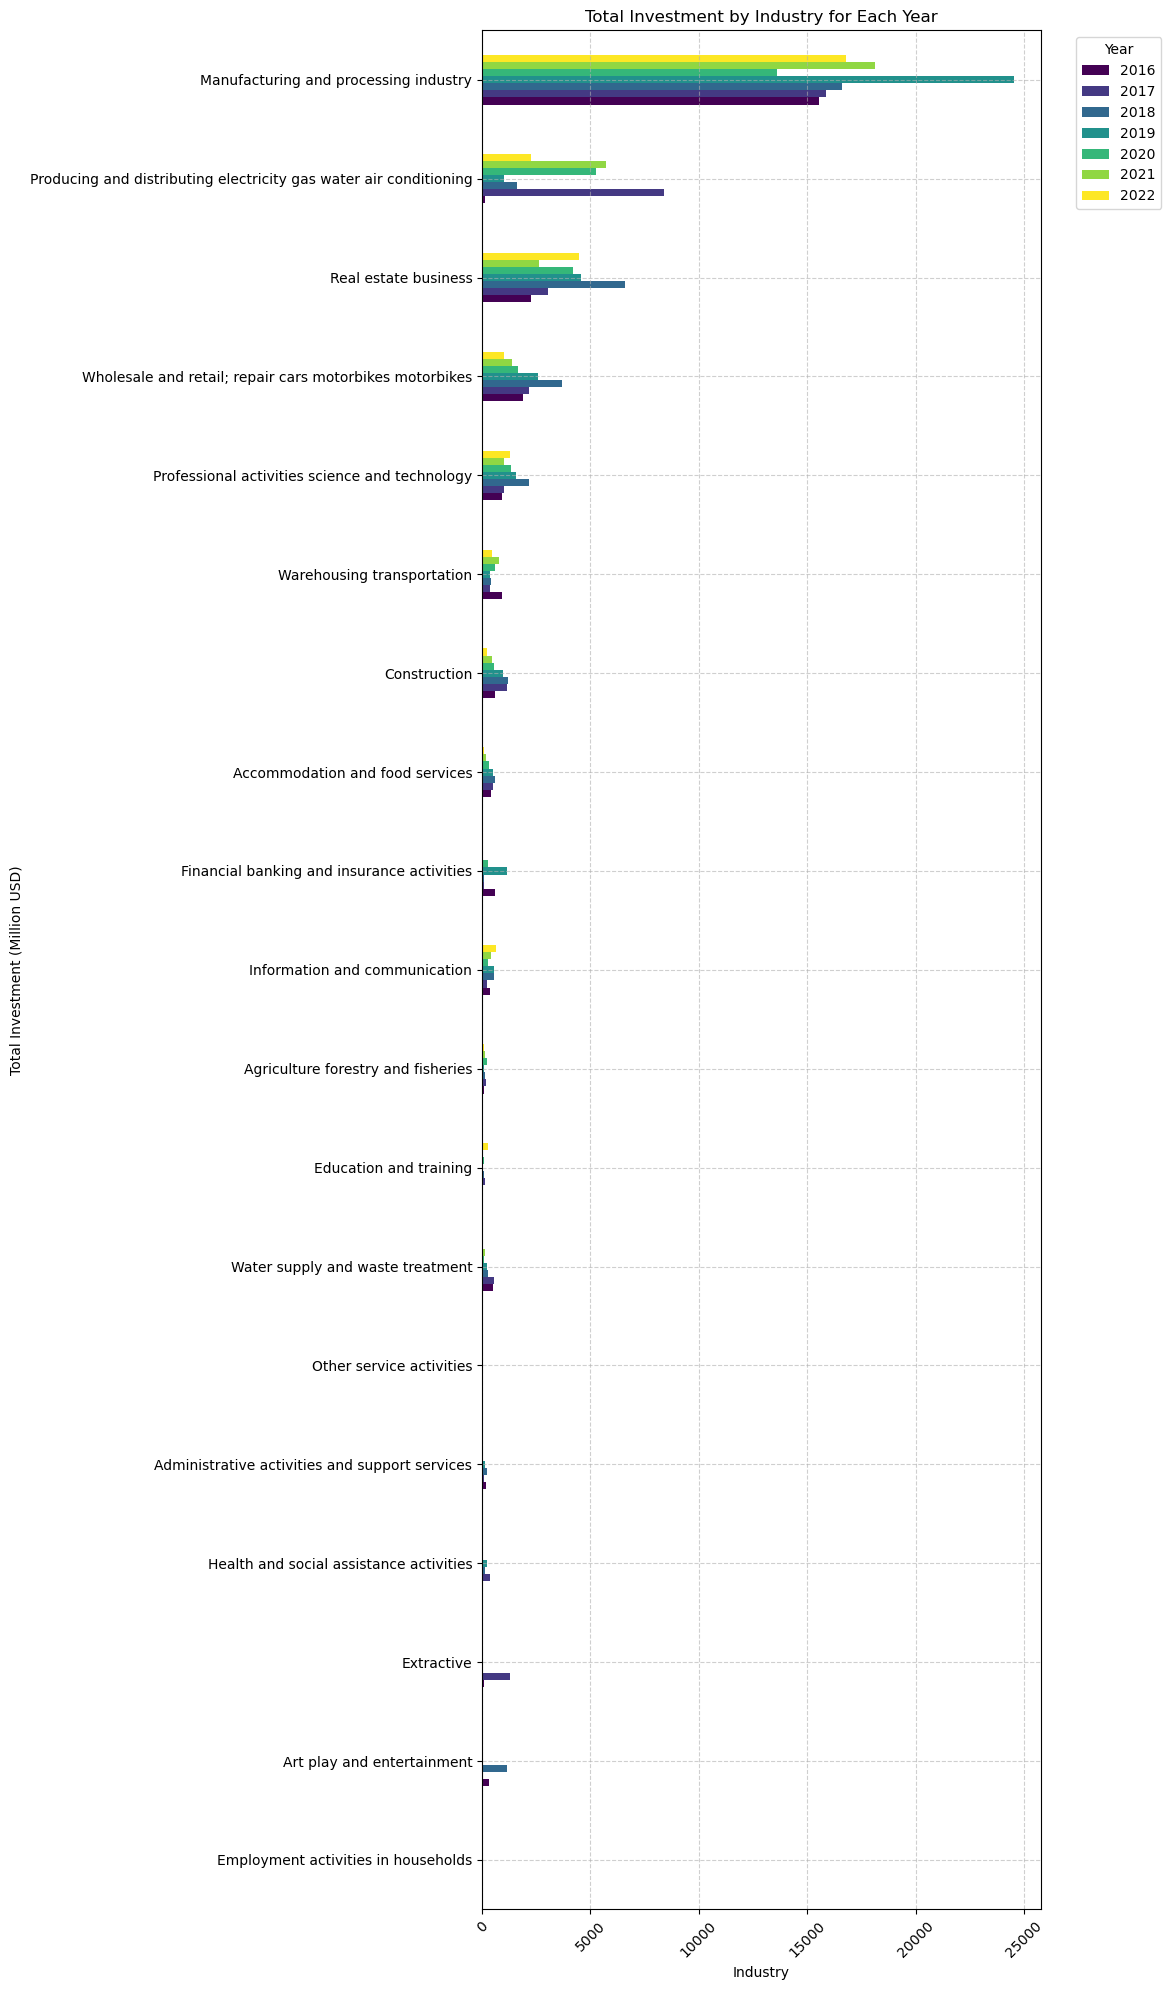

In [511]:
# Plot the grouped bar chart
fig, ax = plt.subplots(figsize=(12, 20))  # Set the figure size
colors = plt.cm.viridis(np.linspace(0, 1, len(years)))
# Plot the bar chart
pivot_df.plot(kind='barh', width=0.5, ax=ax, color=colors )
plt.xlabel('Industry')
plt.ylabel('Total Investment (Million USD)')
plt.title('Total Investment by Industry for Each Year')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Bivariate Analysis

In [512]:
# Group by year
group_year_df = n_df.groupby('Year')
# Print the size of each group
print(group_year_df.size())

Year
2016    19
2017    19
2018    18
2019    19
2020    19
2021    18
2022    19
dtype: int64


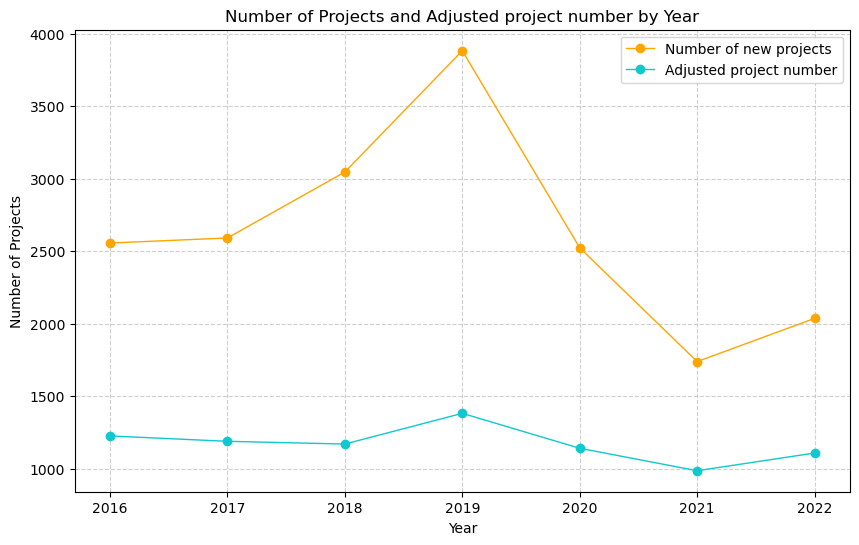

In [516]:
# Set axis values
x = group_year_df['Year'].unique()
y1 = group_year_df['Number of new projects'].sum()
y2 = group_year_df['Adjusted project number'].sum()
# Plot
plt.figure(figsize=(10, 6))
# Line for Number of new projects
plt.plot(x, y1, marker='o', color='orange', label='Number of new projects',linewidth=1)
# Line for Adjusted project number
plt.plot(x, y2, marker='o', color='#10c8ce', label='Adjusted project number',linewidth=1)
plt.xlabel('Year')
plt.ylabel('Number of Projects')
plt.title('Number of Projects and Adjusted project number by Year')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

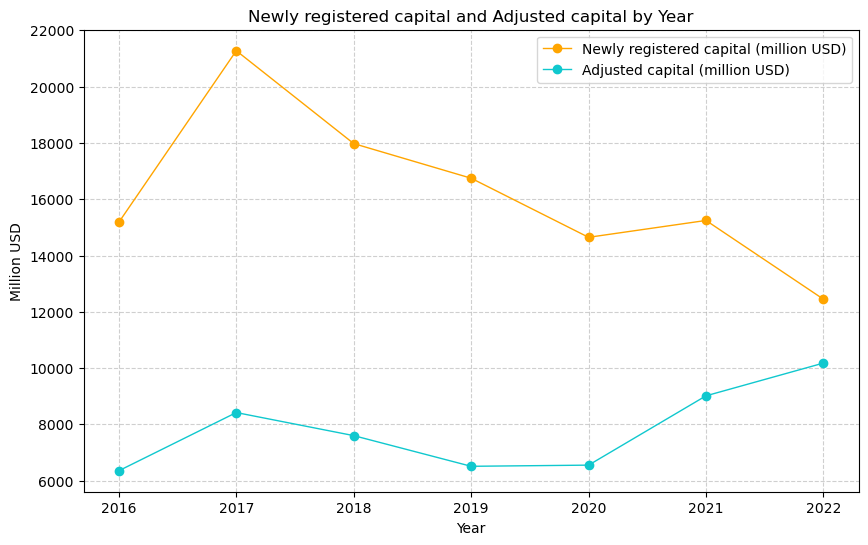

In [517]:
# Set axis values
x = group_year_df['Year'].unique()
y1 = group_year_df['Newly registered capital (million USD)'].sum()
y2 = group_year_df['Adjusted capital (million USD)'].sum()
# Plot
plt.figure(figsize=(10, 6))
# Line for Number of new projects
plt.plot(x, y1, marker='o', color='orange', label='Newly registered capital (million USD)',linewidth=1)
# Line for Adjusted project number
plt.plot(x, y2, marker='o', color='#10c8ce', label='Adjusted capital (million USD)',linewidth=1)
plt.xlabel('Year')
plt.ylabel('Million USD')
plt.title('Newly registered capital and Adjusted capital by Year')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Multivariate Analysis

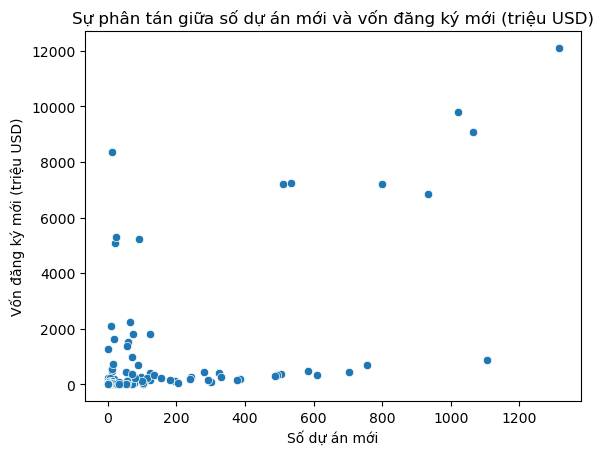

In [519]:
# Giả sử df là DataFrame của bạn
sns.scatterplot(x='Number of new projects', y='Newly registered capital (million USD)', data=n_df)
plt.title('Sự phân tán giữa số dự án mới và vốn đăng ký mới (triệu USD)')
plt.xlabel('Số dự án mới')
plt.ylabel('Vốn đăng ký mới (triệu USD)')
plt.show()

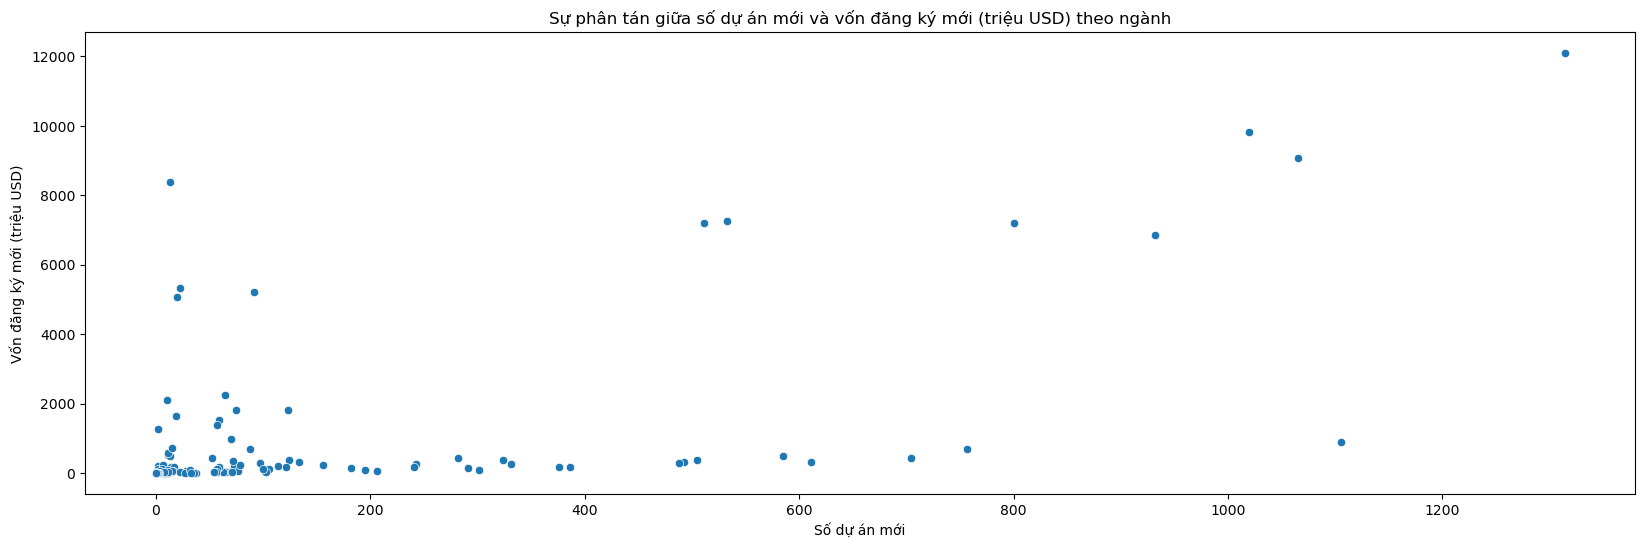

In [526]:
# figure size
plt.figure(figsize=(20, 6))
sns.scatterplot(x='Number of new projects', y='Newly registered capital (million USD)', data=n_df)
plt.title('Sự phân tán giữa số dự án mới và vốn đăng ký mới (triệu USD) theo ngành')
plt.xlabel('Số dự án mới')
plt.ylabel('Vốn đăng ký mới (triệu USD)')
plt.show()


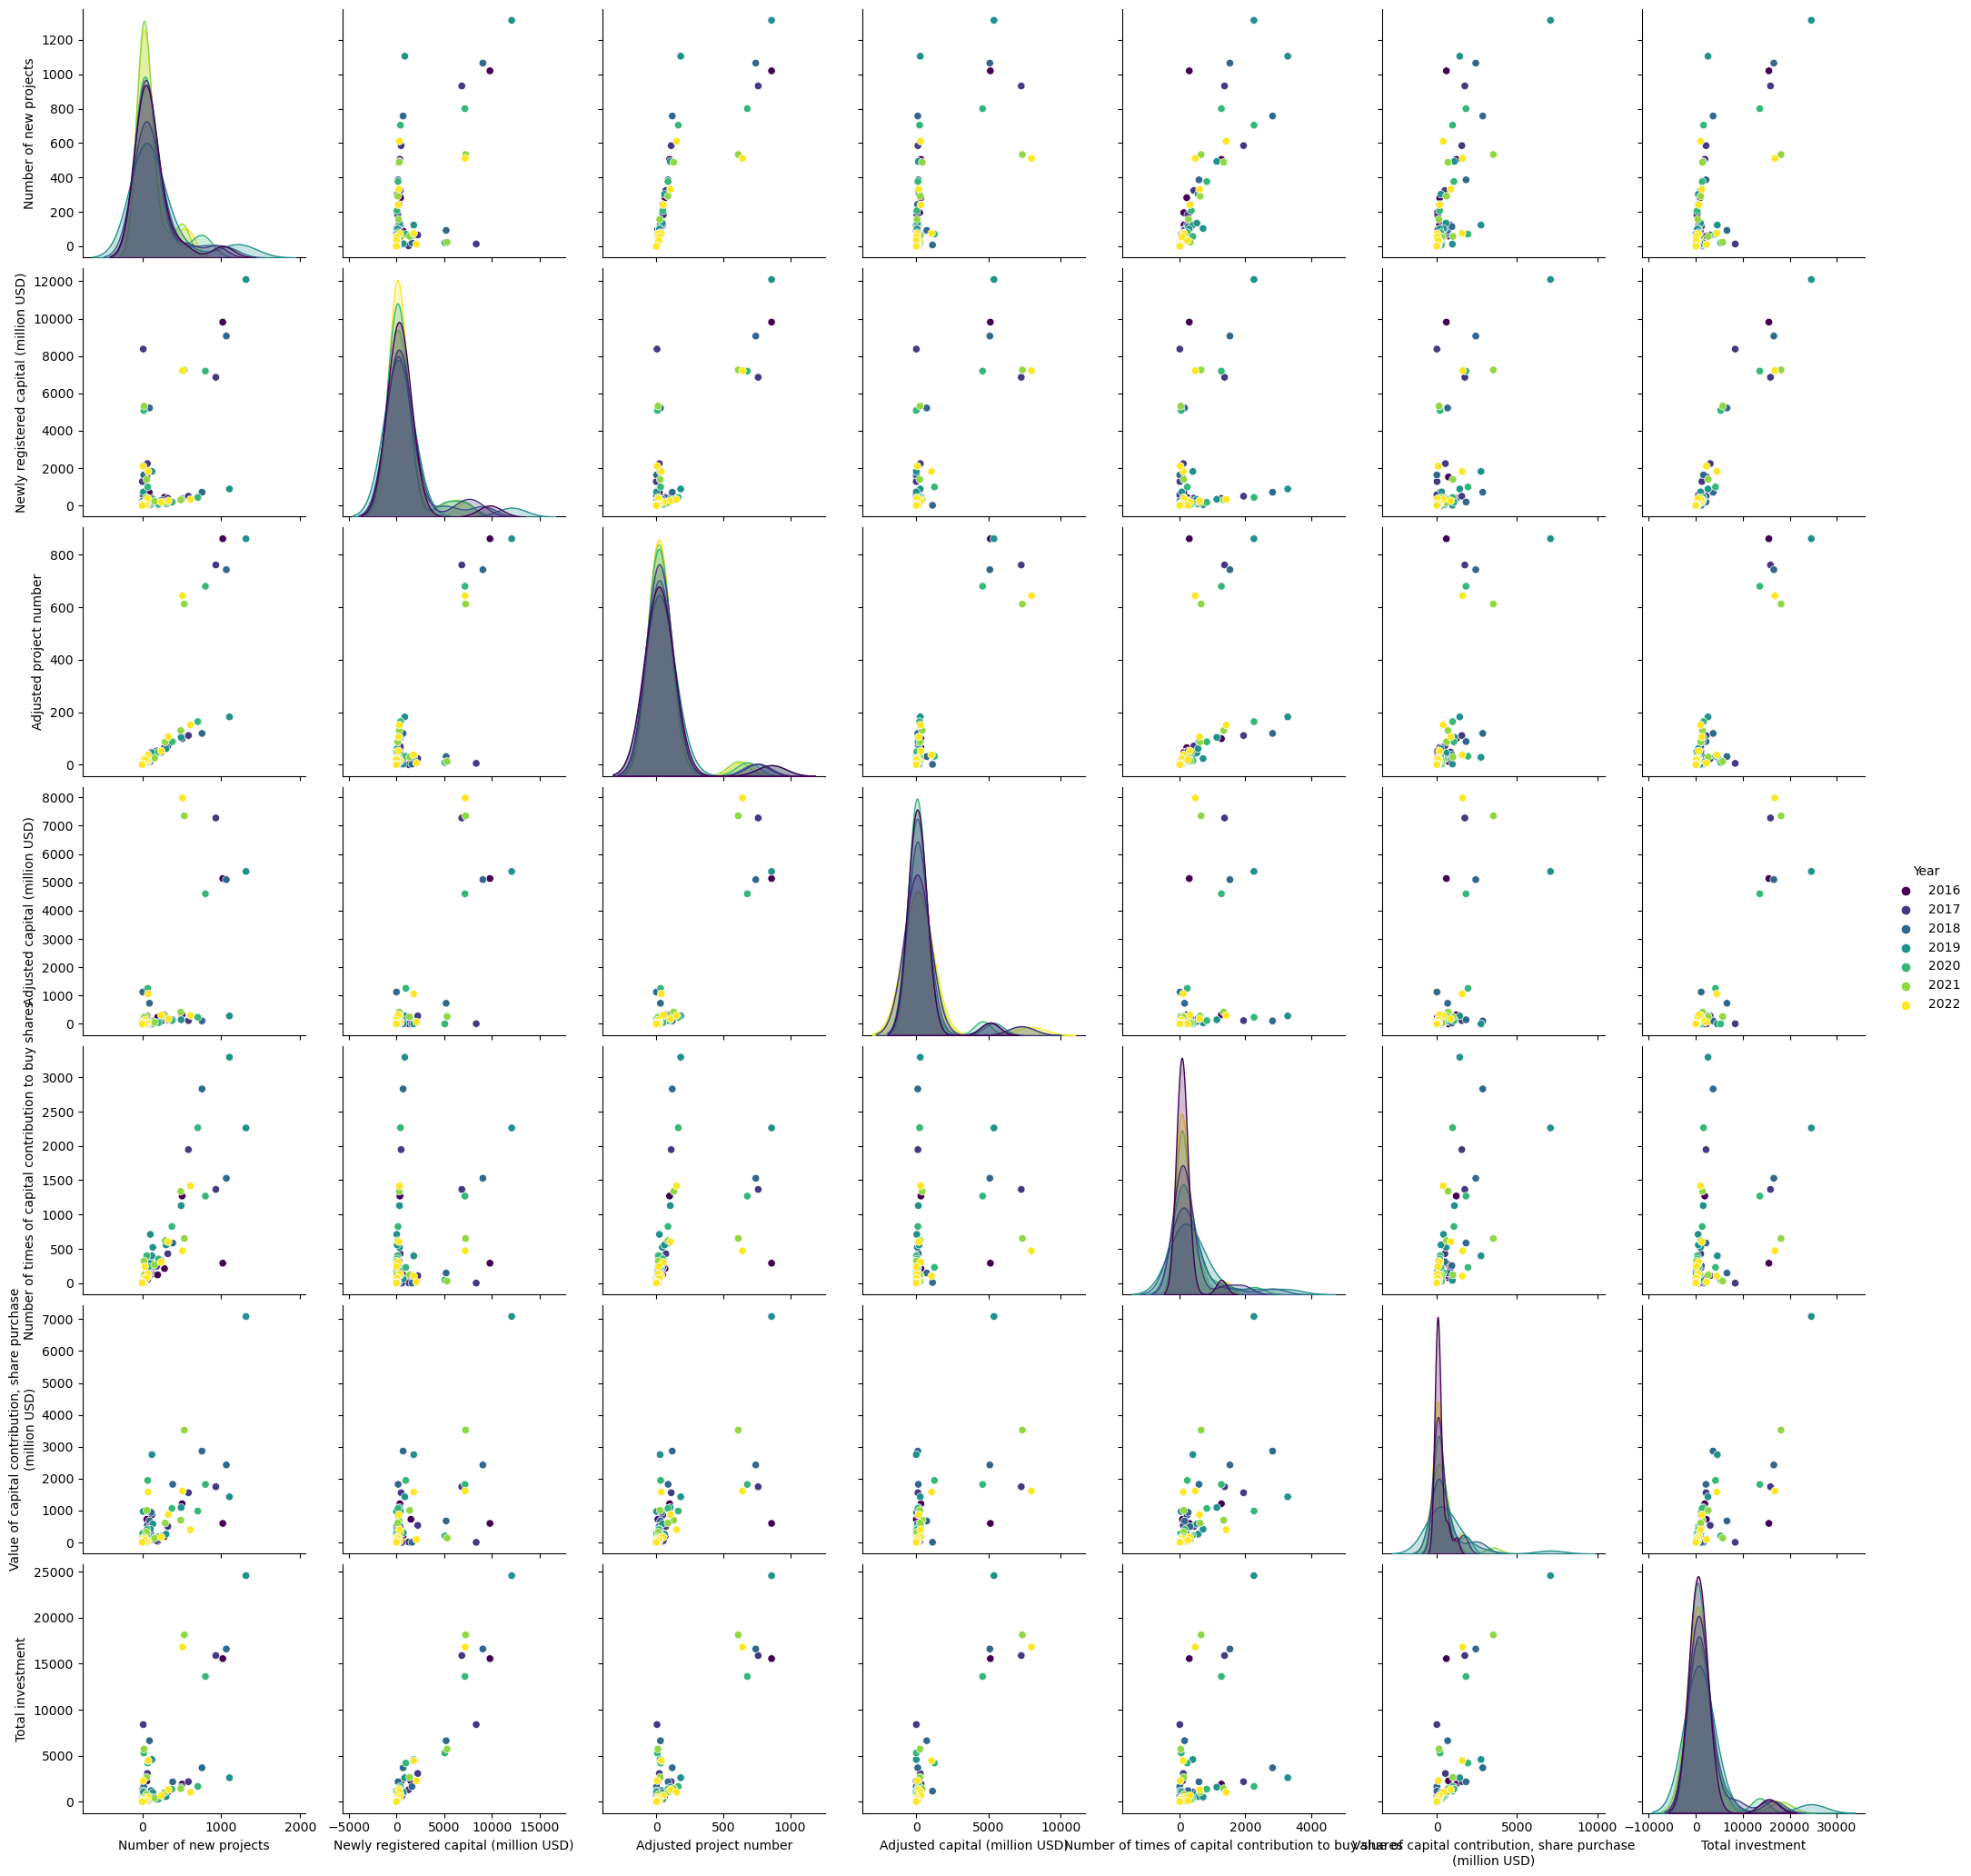

In [562]:
# Giữ nguyên tất cả các cột ngoại trừ 'Industry'
columns_to_plot = n_df.drop(columns=['Industry']).columns.tolist()

# Sắp xếp các năm và tạo màu cho từng năm
years = sorted(n_df['Year'].unique())
colors = plt.cm.viridis(np.linspace(0, 1, len(years)))

# Tạo dictionary ánh xạ các năm với màu tương ứng
palette = dict(zip(years, colors))

# Tạo Pairplot với cột 'Year' dùng làm hue và bảng màu tùy chỉnh
sns.pairplot(n_df[columns_to_plot], hue='Year', height=3, palette=palette)
plt.show()

In [565]:
# Khởi tạo panel extension cho Jupyter Notebook
pn.extension('plotly')
# Khởi tạo thanh trượt để chọn năm
year_slider = pn.widgets.IntSlider(name='Select Year', start=years[0], end=years[-1], step=1, value=years[0])

# Hàm tạo heatmap cho năm được chọn
def create_heatmap(year):
    df_year = n_df[n_df['Year'] == year].drop(columns=['Industry', 'Year'])
    corr_matrix = df_year.corr()

    fig = px.imshow(corr_matrix, text_auto=True, aspect="auto", color_continuous_scale='Viridis')
    fig.update_layout(title=f'Correlation Heatmap for Year {year}', width=800, height=700)
    
    return fig

# Liên kết thanh trượt với hàm tạo heatmap
@pn.depends(year_slider)
def update_heatmap(year):
    return create_heatmap(year)

# Hiển thị trong cell của notebook
pn.Column(year_slider, update_heatmap).servable()

BokehModel(combine_events=True, render_bundle={'docs_json': {'26dda2a6-1166-4f24-a8f6-52e39fa532b8': {'version…

Column
    [0] IntSlider(end=2022, name='Select Year', start=2016, value=2016)
    [1] ParamFunction(function, _pane=Plotly, defer_load=False)

Total investment forecast for 2023: 30730.11 million USD
Total investment forecast for 2024: 30471.11 million USD


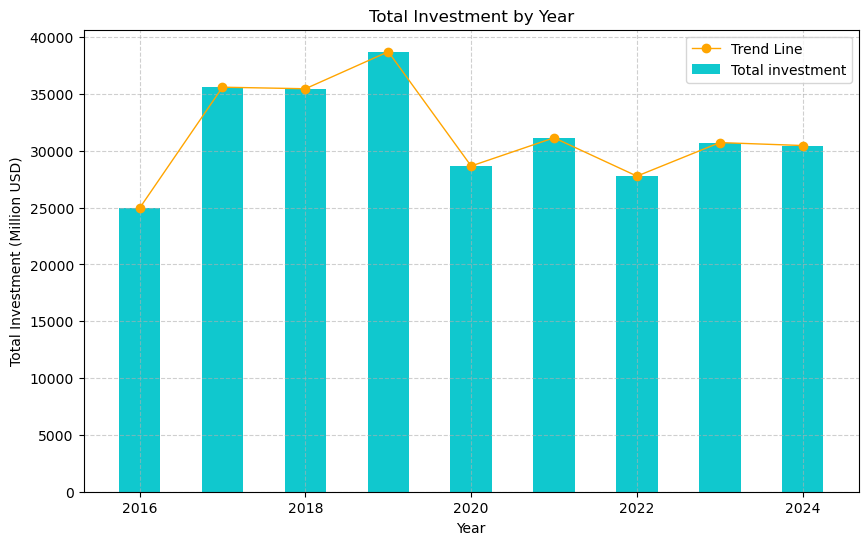

In [548]:
from sklearn.linear_model import LinearRegression

# Giả sử bạn đã có dữ liệu trong n_df
# Tính toán tổng đầu tư cho mỗi năm
n_df['Total investment'] = n_df['Newly registered capital (million USD)'] + \
                           n_df['Adjusted capital (million USD)'] + \
                           n_df['Value of capital contribution, share purchase\n(million USD)']

# Tổng đầu tư theo năm
total_investment_by_year = n_df.groupby('Year')['Total investment'].sum().reset_index()

# Tạo dữ liệu cho mô hình
X = total_investment_by_year[['Year']].values
y = total_investment_by_year['Total investment'].values

# Huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X, y)

# Dự đoán cho các năm 2023 và 2024
future_years = np.array([[2023], [2024]])
predictions = model.predict(future_years)
for year, prediction in zip([2023, 2024], predictions):
    print(f'Total investment forecast for {year}: {prediction:.2f} million USD')
# Thêm dự đoán vào DataFrame
future_data = pd.DataFrame({'Year': [2023, 2024], 'Total investment': predictions})
total_investment_by_year = pd.concat([total_investment_by_year, future_data], ignore_index=True)

# Vẽ đồ thị tổng đầu tư theo năm
plt.figure(figsize=(10, 6))
plt.bar(total_investment_by_year['Year'], total_investment_by_year['Total investment'], color='#10c8ce', width=0.5, label='Total investment')
plt.plot(total_investment_by_year['Year'], total_investment_by_year['Total investment'], color='orange', marker='o', linewidth=1, label='Trend Line')
plt.xlabel('Year')
plt.ylabel('Total Investment (Million USD)')
plt.title('Total Investment by Year')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()